<a href="https://colab.research.google.com/github/Pagadala-Ananya/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52046_PAGADALA_ANANYA_DAUP(LAB_ACTIVITY_10(BINOMIAL)PE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P(X >= 4) where X ~ Bin(10, 0.3): 0.3504


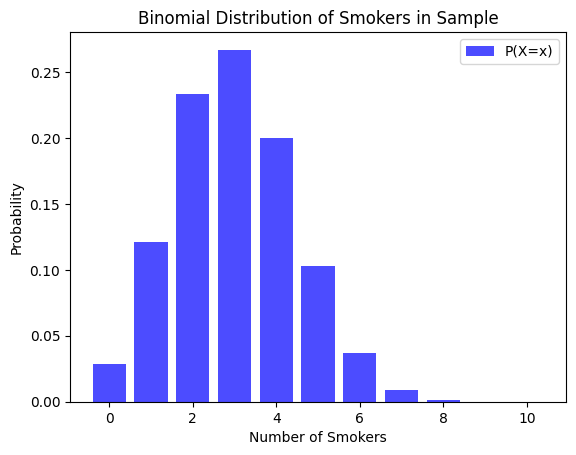

P(X = 5) where X ~ Bin(15, 0.2): 0.1032
P(X <= 5) where X ~ Bin(15, 0.2): 0.9389


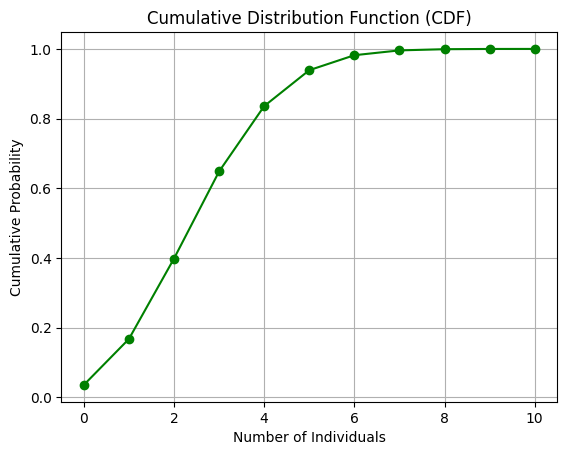

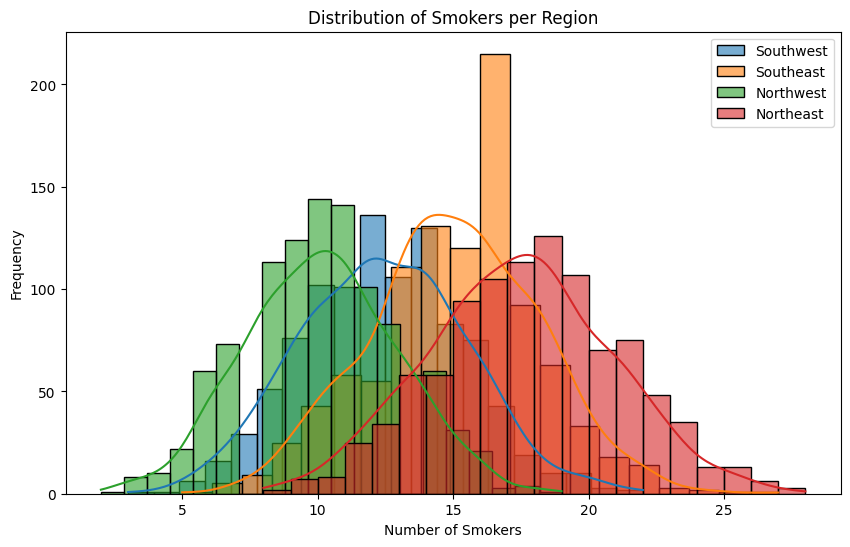

Expected number of smokers per region:
Southwest: 12.5
Southeast: 15.0
Northwest: 10.0
Northeast: 17.5
Threshold for high-risk insurance claims: 25.0
P(X = 8) where X ~ Bin(30, 0.2): 0.1106


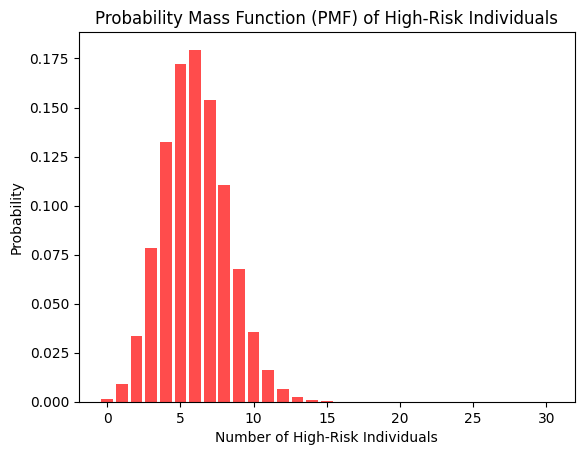

P(X >= 5) where X ~ Bin(12, 0.4): 0.5618


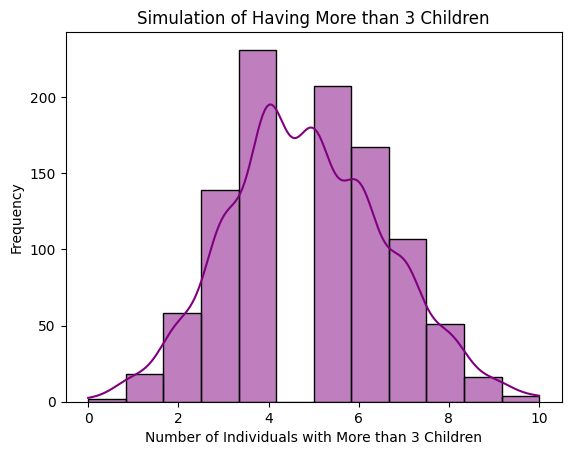

Theoretical Mean: 4.800000000000001, Simulated Mean: 4.8530
Theoretical Variance: 2.8800000000000003, Simulated Variance: 3.0354


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the insurance dataset
file_path = '/content/insurance.csv'
df = pd.read_csv(file_path)

# Question 1: Binomial Probability in Insurance Claims
p_smoker = 0.3
n = 10
x = 4

# (a) Probability of at least 4 smokers
prob_at_least_4 = 1 - stats.binom.cdf(3, n, p_smoker)
print(f"P(X >= 4) where X ~ Bin(10, 0.3): {prob_at_least_4:.4f}")

# (b) Plot the Binomial Distribution
x_vals = np.arange(0, n + 1)
y_vals = stats.binom.pmf(x_vals, n, p_smoker)
plt.bar(x_vals, y_vals, alpha=0.7, color='blue', label='P(X=x)')
plt.xlabel('Number of Smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Smokers in Sample')
plt.legend()
plt.show()

# Question 2: Risk Estimation Using Binomial Distribution
p_expensive = 0.2
n2 = 15
x2 = 5

# (a) Probability of exactly 5 individuals with charges above $20,000
prob_exact_5 = stats.binom.pmf(x2, n2, p_expensive)
print(f"P(X = 5) where X ~ Bin(15, 0.2): {prob_exact_5:.4f}")

# (b) Cumulative probability of at most 5
prob_at_most_5 = stats.binom.cdf(x2, n2, p_expensive)
print(f"P(X <= 5) where X ~ Bin(15, 0.2): {prob_at_most_5:.4f}")

# (c) Plot the CDF
plt.plot(x_vals, stats.binom.cdf(x_vals, n2, p_expensive), marker='o', linestyle='-', color='green')
plt.xlabel('Number of Individuals')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid()
plt.show()

# Question 3: Estimating Regional Smoking Rates Using Binomial Approximation
regions = {'Southwest': 0.25, 'Southeast': 0.3, 'Northwest': 0.2, 'Northeast': 0.35}
n_samples = 1000
n_individuals = 50

simulations = {region: np.random.binomial(n_individuals, p, n_samples) for region, p in regions.items()}

# (b) Visualize with bar chart
plt.figure(figsize=(10, 6))
for region, data in simulations.items():
    sns.histplot(data, kde=True, label=region, bins=20, alpha=0.6)
plt.xlabel('Number of Smokers')
plt.ylabel('Frequency')
plt.title('Distribution of Smokers per Region')
plt.legend()
plt.show()

# (c) Compute expected smokers per region
expected_values = {region: n_individuals * p for region, p in regions.items()}
print("Expected number of smokers per region:")
for region, expected in expected_values.items():
    print(f"{region}: {expected}")

# Question 4: Inverse Probability & Quantile Function
q_threshold = stats.binom.ppf(0.9, 100, 0.2)
print(f"Threshold for high-risk insurance claims: {q_threshold}")

# (b) Probability of selecting 8 high-risk individuals in a sample of 30
prob_8_high_risk = stats.binom.pmf(8, 30, 0.2)
print(f"P(X = 8) where X ~ Bin(30, 0.2): {prob_8_high_risk:.4f}")

# (c) Plot the PMF
x_vals = np.arange(0, 31)
y_vals = stats.binom.pmf(x_vals, 30, 0.2)
plt.bar(x_vals, y_vals, alpha=0.7, color='red')
plt.xlabel('Number of High-Risk Individuals')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of High-Risk Individuals')
plt.show()

# Question 5: Modeling the Probability of Having More than 3 Children
p_more_than_3_children = 0.4
n_children = 12
x_children = 5

# (a) Probability of at least 5 having more than 3 children
prob_at_least_5_children = 1 - stats.binom.cdf(4, n_children, p_more_than_3_children)
print(f"P(X >= 5) where X ~ Bin(12, 0.4): {prob_at_least_5_children:.4f}")

# (b) Simulate and plot histogram
simulated_children = np.random.binomial(n_children, p_more_than_3_children, 1000)
sns.histplot(simulated_children, kde=True, bins=12, color='purple')
plt.xlabel('Number of Individuals with More than 3 Children')
plt.ylabel('Frequency')
plt.title('Simulation of Having More than 3 Children')
plt.show()

# (c) Compare theoretical vs simulated mean and variance
theoretical_mean = n_children * p_more_than_3_children
theoretical_variance = n_children * p_more_than_3_children * (1 - p_more_than_3_children)

simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children)

print(f"Theoretical Mean: {theoretical_mean}, Simulated Mean: {simulated_mean:.4f}")
print(f"Theoretical Variance: {theoretical_variance}, Simulated Variance: {simulated_variance:.4f}")